# All Features Model

## Environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.6g}'.format)

from scipy import stats
from scipy.stats import t

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.inspection import permutation_importance

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

## All features Model

**All Features + Target Transform MODEL:**
    
    - Dataset: All Features
    - Train Test Split 80/20
    - NaN Imputer - Median
    - Target transform
    - Linear Regression - sklearn
    - Métricas: MAE, RMSE, R2

### Dataset (All Features)

In [2]:
df = pd.read_csv("data/airbnb-all-encoded.csv")

In [3]:
df.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Reviews per Month', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Price', 'Neighbourhood_Barajas', 'Neighbourhood_Carabanchel',
       'Neighbourhood_Centro', 'Neighbourhood_Chamartin',
       'Neighbourhood_Chamberi', 'Neighbourhood_CiudadLineal',
       'Neighbourhood_Fuencarral', 'Neighbourhood_Hortaleza',
       'Neighbourhood_Latina', 'Neighbourhood_Moncloa',
       

In [4]:
selected_cols = ['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Reviews per Month', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Neighbourhood_Barajas', 'Neighbourhood_Carabanchel',
       'Neighbourhood_Centro', 'Neighbourhood_Chamartin',
       'Neighbourhood_Chamberi', 'Neighbourhood_CiudadLineal',
       'Neighbourhood_Fuencarral', 'Neighbourhood_Hortaleza',
       'Neighbourhood_Latina', 'Neighbourhood_Moncloa',
       'Neighbourhood_Moratalaz', 'Neighbourhood_PuenteVallecas',
       'Neighbourhood_Retiro', 'Neighbourhood_Salamanca',
       'Neighbourhood_SanBlas', 'Neighbourhood_Tetuan', 'Neighbourhood_Usera',
       'Neighbourhood_Vicalvaro', 'Neighbourhood_VillaVallecas',
       'Neighbourhood_Villaverde', 'PropertyType_BedAndBreakfast',
       'PropertyType_Condominium', 'PropertyType_House', 'PropertyType_Loft',
       'PropertyType_Other', 'BedType_PrivateRoom', 'BedType_SharedRoom',
       'Cancellation_moderate', 'Cancellation_strict', 'Price']

In [5]:
df = df[selected_cols]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        13115 non-null  float64
 1   Longitude                       13115 non-null  float64
 2   Accommodates                    13115 non-null  int64  
 3   Bathrooms                       13115 non-null  float64
 4   Bedrooms                        13115 non-null  float64
 5   Beds                            13115 non-null  float64
 6   Guests Included                 13115 non-null  int64  
 7   Extra People                    13115 non-null  int64  
 8   Minimum Nights                  13115 non-null  int64  
 9   Availability 30                 13115 non-null  int64  
 10  Availability 365                13115 non-null  int64  
 11  Number of Reviews               13115 non-null  int64  
 12  Review Scores Rating            

In [7]:
df.shape

(13115, 63)

In [8]:
df.isnull().sum().sum()

19397

### Train Test Split

In [9]:
target = 'Price'
X = df.drop(target, axis=1)
y = df[target]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### NaN Imputation

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 4003 to 7270
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        10492 non-null  float64
 1   Longitude                       10492 non-null  float64
 2   Accommodates                    10492 non-null  int64  
 3   Bathrooms                       10492 non-null  float64
 4   Bedrooms                        10492 non-null  float64
 5   Beds                            10492 non-null  float64
 6   Guests Included                 10492 non-null  int64  
 7   Extra People                    10492 non-null  int64  
 8   Minimum Nights                  10492 non-null  int64  
 9   Availability 30                 10492 non-null  int64  
 10  Availability 365                10492 non-null  int64  
 11  Number of Reviews               10492 non-null  int64  
 12  Review Scores Rating          

#### Median

In [12]:
X_train.median()

Latitude                 40.4186
Longitude               -3.70159
Accommodates                   2
Bathrooms                      1
Bedrooms                       1
                          ...   
PropertyType_Other             0
BedType_PrivateRoom            0
BedType_SharedRoom             0
Cancellation_moderate          0
Cancellation_strict            0
Length: 62, dtype: float64

In [13]:
X_train = X_train.fillna(X_train.median())

In [14]:
X_test = X_test.fillna(X_train.median()) #X_train Median for Data Leak

In [15]:
X_train.isnull().sum().sum()

0

In [16]:
X_test.isnull().sum().sum()

0

In [17]:
len(X_train.columns)

62

### Polynomial Features

In [18]:
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

In [19]:
X_train_poly = poly.fit_transform(X_train)

In [20]:
polynomial_column_names = poly.get_feature_names_out(input_features = X_train.columns)

In [21]:
X_train_poly = pd.DataFrame(data = X_train_poly, columns = polynomial_column_names )
X_train_poly.columns = X_train_poly.columns.str.replace(' ', '_', regex=True)
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_',regex=True)

In [22]:
X_test_poly = poly.transform(X_test)

In [23]:
X_test_poly = poly.transform(X_test)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = polynomial_column_names )
X_test_poly.columns = X_test_poly.columns.str.replace(' ', '_', regex=True)
X_test_poly.columns = X_test_poly.columns.str.replace('^', '_',regex=True)

In [24]:
X_train = X_train_poly
X_test = X_test_poly

In [25]:
X_train.head()

Latitude  Longitude  Accommodates  Bathrooms  Bedrooms  Beds  \
0   40.4138   -3.70146             3          1         1     1   
1   40.4331   -3.70919             3          1         1     1   
2   40.3923    -3.7421             5          2         3     3   
3   40.4702   -3.70367             4          1         2     2   
4   40.4223   -3.70001             4          1         2     5   

   Guests_Included  Extra_People  Minimum_Nights  Availability_30  \
0                2            15               2                4   
1                1             0               1                2   
2                1             0               5                8   
3                1             0               3               22   
4                2            20               1                3   

   Availability_365  Number_of_Reviews  Review_Scores_Rating  \
0               262                 32                    98   
1               324                 49                    90   
2                95                  0                    94   
3                82                  9                    96   
4               221                 74                    99   

   Review_Scores_Cleanliness  Review_Scores_Checkin  \
0                         10                     10   
1                          9                      9   
2                         10                     10   
3                         10                     10   
4                         10                     10   

   Review_Scores_Communication  Review_Scores_Location  Reviews_per_Month  \
0                           10                      10               1.39   
1                            9                       9               1.97   
2                           10                      10               1.29   
3                           10                      10               1.03   
4                           10                      10               4.83   

   Security_Deposit  Cleaning_Fee  Calculated_host_listings_count  \
0                 0            35                               6   
1                 0            18                               1   
2               300            25                               2   
3               100             0                               1   
4               120            35                               4   

   Num_Host_Verifications  Name_Len  Summary_Len  Space_Len  Description_Len  \
0                       5        35          250        464              999   
1                       3        31          222         50              222   
2                       4        34          237        156              861   
3                       3        19          496         91              878   
4                       4        30          416          8              631   

   Summary_Lang  is_Thumbnail  is_HostAbout  is_ResponseInHours  \
0             1             0             1                   1   
1             1             1             0                   1   
2             0             1             1                   1   
3             0             1             0                   0   
4             1             1             1                   1   

   is_EntireHome  is_Bed  is_UpdatedToday  Neighbourhood_Barajas  \
0              1       1                1                      0   
1              1       1                0                      0   
2              1       1                1                      0   
3              1       1                0                      0   
4              1       1                1                      0   

   Neighbourhood_Carabanchel  Neighbourhood_Centro  Neighbourhood_Chamartin  \
0                          0                     1                        0   
1                          0                     0                        0   
2                          1                     0           

In [26]:
X_test.head()

Latitude  Longitude  Accommodates  Bathrooms  Bedrooms  Beds  \
0   40.4094   -3.69661             2          1         1     1   
1   40.4553   -3.68033             4          1         1     2   
2   40.4272   -3.67032             4          1         2     2   
3   40.4234   -3.70783             4          1         1     1   
4   40.3953   -3.71295             2          1         1     1   

   Guests_Included  Extra_People  Minimum_Nights  Availability_30  \
0                1            15               2               16   
1                1             0               1               10   
2                1             0               3                0   
3                2            10               2                0   
4                1             8               1                7   

   Availability_365  Number_of_Reviews  Review_Scores_Rating  \
0               351                  2                   100   
1               334                  3                    93   
2               253                 20                    98   
3               164                  5                    96   
4                67                 11                    89   

   Review_Scores_Cleanliness  Review_Scores_Checkin  \
0                         10                     10   
1                          9                     10   
2                          9                     10   
3                         10                     10   
4                          9                     10   

   Review_Scores_Communication  Review_Scores_Location  Reviews_per_Month  \
0                           10                      10               0.97   
1                           10                       8                  3   
2                           10                      10               0.79   
3                           10                      10               0.77   
4                            9                       9               0.66   

   Security_Deposit  Cleaning_Fee  Calculated_host_listings_count  \
0                 0             0                               1   
1               200            45                               2   
2                 0            40                               1   
3               120            30                               1   
4                 0             5                               1   

   Num_Host_Verifications  Name_Len  Summary_Len  Space_Len  Description_Len  \
0                       3        40          495        461             1000   
1                       8        38          316          0              670   
2                       3        35          498        324             1000   
3                       2        38          401        522             1000   
4                       4        16          326        101             1000   

   Summary_Lang  is_Thumbnail  is_HostAbout  is_ResponseInHours  \
0             0             1             1                   0   
1             1             1             0                   1   
2             1             1             0                   1   
3             1             1             1                   1   
4             0             1             1                   0   

   is_EntireHome  is_Bed  is_UpdatedToday  Neighbourhood_Barajas  \
0              0       1                0                      0   
1              1       1                0                      0   
2              1       1                0                      0   
3              1       1                1                      0   
4              0       1                0                      0   

   Neighbourhood_Carabanchel  Neighbourhood_Centro  Neighbourhood_Chamartin  \
0                          0                     0                        0   
1                          0                     0                        0   
2                          0                     1           

### Sklearn Linear Regression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
X_pred = model.predict(X_train)

In [30]:
y_pred = model.predict(X_test)

### Results

In [31]:
train = ['Train Num FE Rev',
            round(mean_absolute_error(y_train, X_pred),2),
            round(mean_squared_error(y_train, X_pred, squared=False),2),
            round(r2_score(y_train, X_pred),3)]

test = ['Test Num FE Rev',
           round(mean_absolute_error(y_test, y_pred),2),
           round(mean_squared_error(y_test, y_pred, squared=False),2),
           round(r2_score(y_test, y_pred),3)]

results = pd.DataFrame([train, test])
results.columns=['Model','MAE', 'RMSE','R2']

In [32]:
results

,Model,MAE,RMSE,R2
0,Train Num FE Rev,17.58,28.86,0.741
1,Test Num FE Rev,25.69,145.22,-6.443


### Cross Validation

In [33]:
mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MEAN CV MAE: %.3f" %round(abs(mae_scores.mean()),2))

MEAN CV MAE: 27.330


In [34]:
rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("MEAN CV RMSE: %.3f" %round(abs(rmse_scores.mean()),2))

MEAN CV RMSE: 102.820


In [35]:
r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("MEAN CV MAE: %.3f" %round(abs(r2_scores.mean()),2))

MEAN CV MAE: 5.020


### Residuals

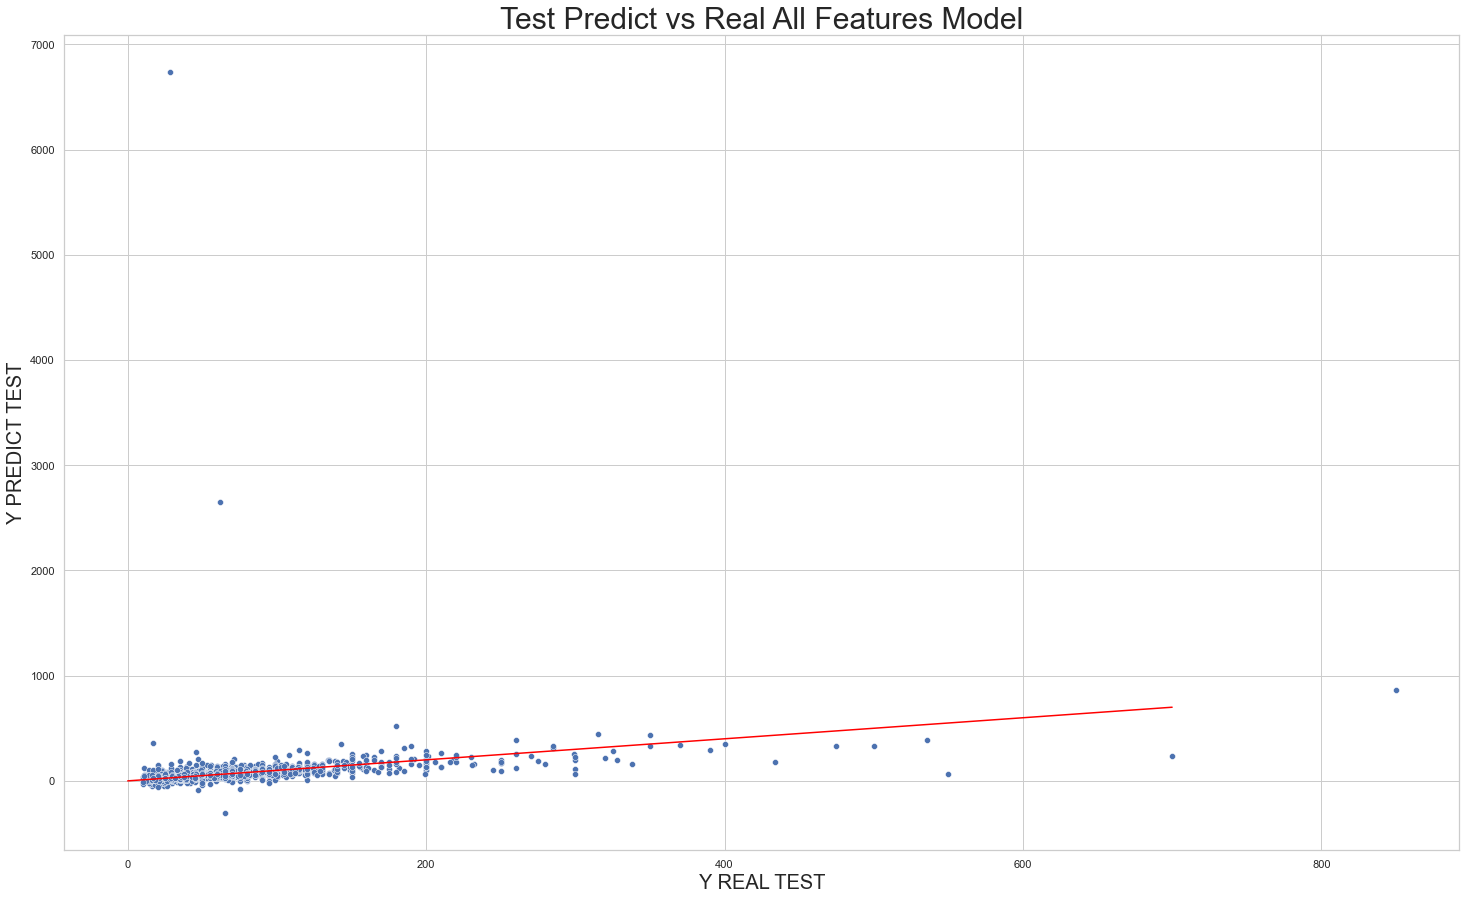

In [36]:
sns.scatterplot(y=y_pred, x=y_test)
sns.lineplot(x=[0,700], y=[0,700], color='red')
plt.title("Test Predict vs Real All Features Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

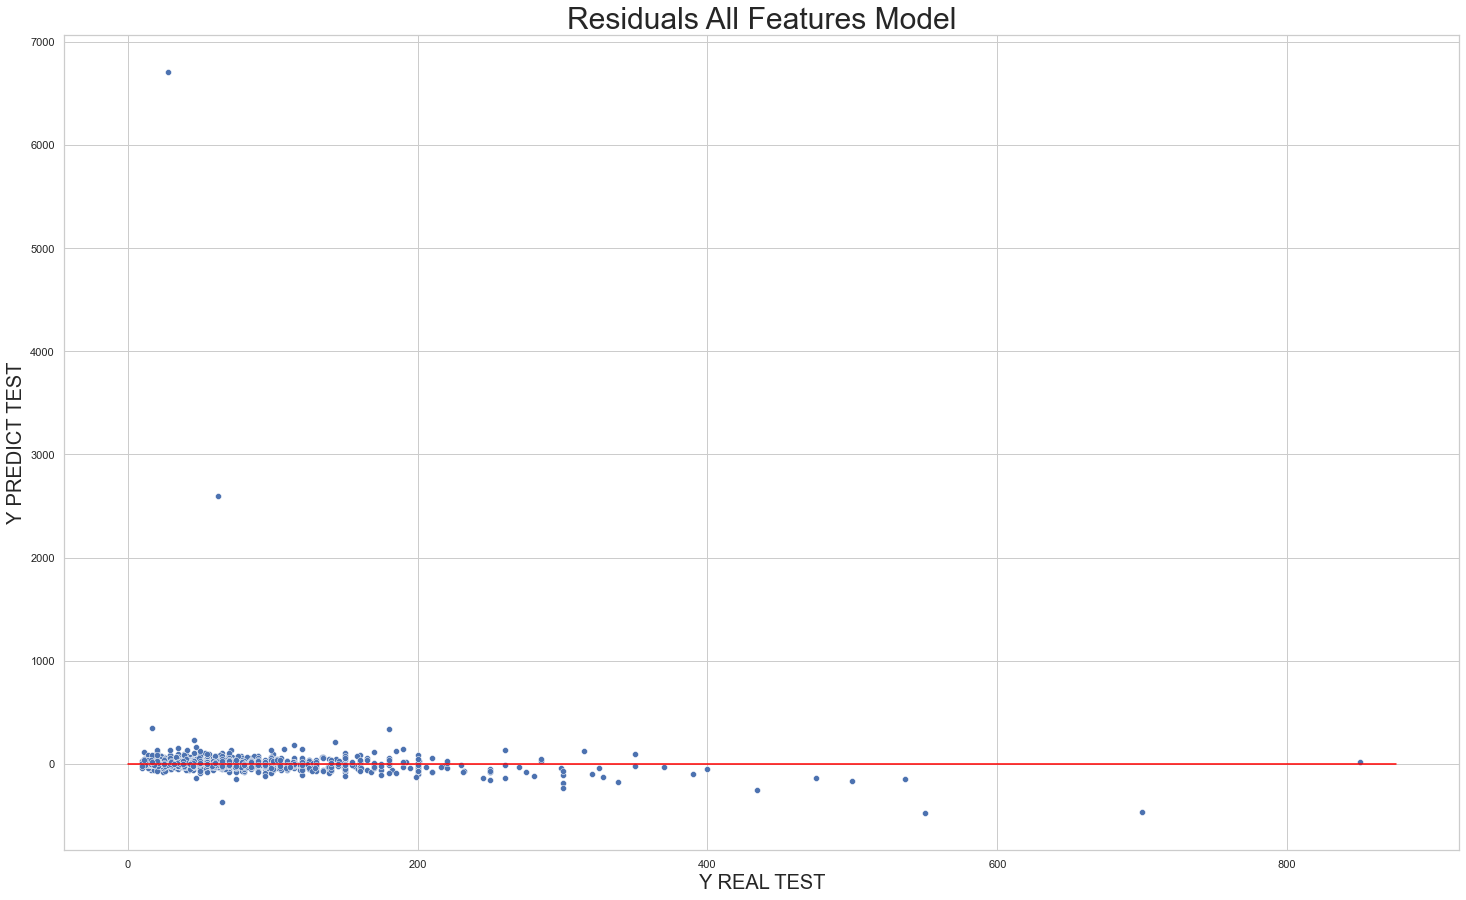

In [37]:
diff = y_pred - y_test
sns.scatterplot(y=diff, x=y_test)
sns.lineplot(x=[0,875], y=[0,0], color='red')
plt.title("Residuals All Features Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

HAy más dificultad en predecir los precios altos

### Permutarion Importance

In [38]:
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=2,random_state=42)

In [39]:
sorted_idx = perm_importance.importances_mean.argsort()

In [40]:
sns.set(rc={"figure.figsize":(25, 25)})
plt.barh(X.columns[sorted_idx][0:20], perm_importance.importances_mean[sorted_idx][0:20])
plt.xlabel("Permutation Importance", size=20)
plt.title('Permutation Importance Base Model', size= 30)
plt.yticks(size=22)
plt.show()

IndexError: index 571 is out of bounds for axis 0 with size 62